Exploratory Data Analysis

1. Basic Info

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv('sentimental_labeling.csv')


print(df.info())


print(df.isnull().sum())

df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   text       2191 non-null   object
 5   sentiment  2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB
None
Subject      0
body         0
date         0
from         0
text         0
sentiment    0
dtype: int64


,Subject,body,date,from,text,sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,enronoptions update! enronoptions announcement...,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,"(no subject) marc, unfortunately, today is no...",Positive
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,phone screen interview - shannon l. burnham w...,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,re: my new work email we were thinking papasit...,Neutral
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,bet since you never gave me the $20 for the la...,Positive
...,...,...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,6/17/2011,johnny.palmer@enron.com,re: resume thanks for the resume. she has had...,Positive
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,1/20/2011,johnny.palmer@enron.com,"final schedule - wednesday, may 2, 2001 - jesu...",Positive
2188,(No Subject),Good to finally hear from. Judging from your ...,1/2/2011,don.baughman@enron.com,(no subject) good to finally hear from. judgi...,Positive
2189,League is Set,It looks like we have our 12 teams. We will p...,3/11/2011,rhonda.denton@enron.com,league is set it looks like we have our 12 tea...,Positive


2. Percentage of Different Labeling

C:\Users\xiaob\AppData\Local\Temp\ipykernel_20260\1304186391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


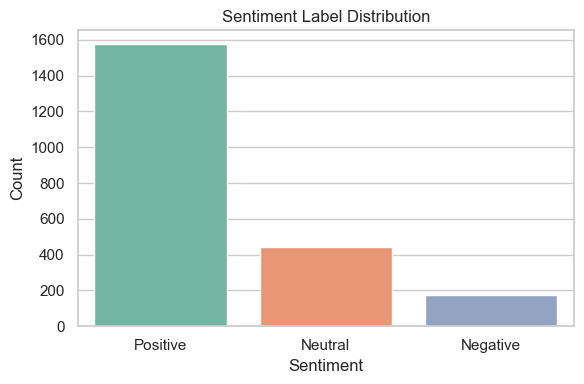

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


3. Time vs Different Labeling

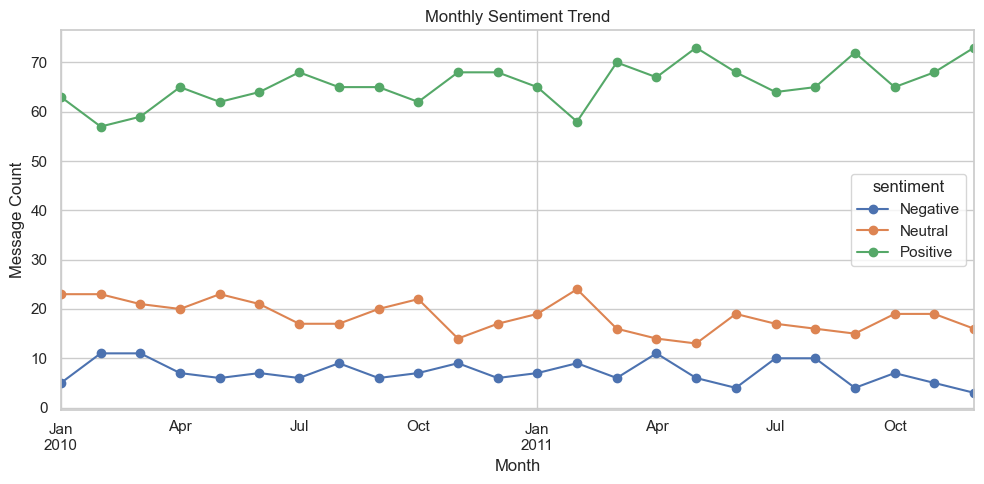

In [12]:

df['timestamp'] = pd.to_datetime(df['date'])

monthly_trend = df.groupby([df['timestamp'].dt.to_period("M"), 'sentiment']).size().unstack().fillna(0)

monthly_trend.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Monthly Sentiment Trend")
plt.ylabel("Message Count")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


4. Box Plot : Message Length vs Sentimental Labeling

C:\Users\xiaob\AppData\Local\Temp\ipykernel_20260\3607765370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='length', data=df, palette='Set3')


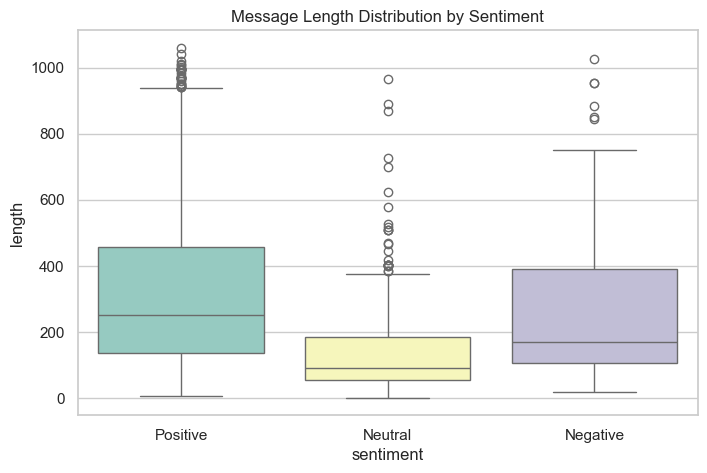

In [14]:

df['length'] = df['text'].apply(len)

plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='length', data=df, palette='Set3')
plt.title("Message Length Distribution by Sentiment")
plt.show()
